In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading our datasets
demographic_data = pd.read_csv('Demographic.csv')
blood_pressure_data = pd.read_csv('BP.csv')
body_measures_data = pd.read_csv('Body_Measure.csv')
cholesterol_data = pd.read_csv('Total_Chol.csv')
glucose_data = pd.read_csv('Plasma_fasting_glucose.csv')
glycohemoglobin_data = pd.read_csv('Glycohemoglobin.csv')
insulin_data = pd.read_csv('Insulin.csv')
nicotine_data = pd.read_csv('Nicotine.csv')
bpq_data = pd.read_csv('BP_Chol.csv')

In [5]:
# Filtering out all the relevant variables from each dataset
demographic_columns = [
    'SEQN', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 'DMDEDUC3', 'DMDHHSIZ', 'DMDHHSZA',
    'DMDHHSZB', 'DMDHHSZE', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRGND', 'DMDHRMAZ',
    'DMDMARTL', 'INDFMPIR', 'INDHHIN2', 'RIAGENDR', 'RIDAGEMN', 'RIDAGEYR',
    'RIDEXAGM', 'RIDEXPRG', 'RIDRETH1', 'RIDRETH3', 'WTINT2YR', 'WTMEC2YR'
]
blood_pressure_columns = ['SEQN', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXPULS', 'BPXSY1', 'BPXSY2', 'BPXSY3']
body_measures_columns = ['SEQN', 'BMXBMI', 'BMXHT', 'BMXWT']
cholesterol_columns = ['SEQN', 'LBXTC']
glucose_columns = ['SEQN', 'LBXGLU']
glycohemoglobin_columns = ['SEQN', 'LBXGH']
insulin_columns = ['SEQN', 'LBXIN', 'WTSAF2YR']
nicotine_columns = ['SEQN', 'URDTNE2', 'URXNICT']
bpq_columns = ['SEQN', 'BPD035', 'BPQ020', 'BPQ080']

# Retain only our specified columns
demographic_data = demographic_data[demographic_columns]
blood_pressure_data = blood_pressure_data[blood_pressure_columns]
body_measures_data = body_measures_data[body_measures_columns]
cholesterol_data = cholesterol_data[cholesterol_columns]
glucose_data = glucose_data[glucose_columns]
glycohemoglobin_data = glycohemoglobin_data[glycohemoglobin_columns]
insulin_data = insulin_data[insulin_columns]
nicotine_data = nicotine_data[nicotine_columns]
bpq_data = bpq_data[bpq_columns]

In [7]:
print(f"Number of rows in demographic_data: {demographic_data.shape[0]}")
print(f"Number of rows in blood_pressure_data: {blood_pressure_data.shape[0]}")
print(f"Number of rows in body_measures_data: {body_measures_data.shape[0]}")
print(f"Number of rows in cholesterol_data: {cholesterol_data.shape[0]}")
print(f"Number of rows in glucose_data: {glucose_data.shape[0]}")
print(f"Number of rows in glycohemoglobin_data: {glycohemoglobin_data.shape[0]}")
print(f"Number of rows in insulin_data: {insulin_data.shape[0]}")
print(f"Number of rows in nicotine_data: {nicotine_data.shape[0]}")
print(f"Number of rows in bpq_data: {bpq_data.shape[0]}")

Number of rows in demographic_data: 9254
Number of rows in blood_pressure_data: 8704
Number of rows in body_measures_data: 8704
Number of rows in cholesterol_data: 7435
Number of rows in glucose_data: 3036
Number of rows in glycohemoglobin_data: 6401
Number of rows in insulin_data: 3036
Number of rows in nicotine_data: 2979
Number of rows in bpq_data: 6161


In [9]:
# Merging all our datasets on respondent number using primary key - SEQN
merged_data = demographic_data
datasets = [
    blood_pressure_data, body_measures_data, cholesterol_data, glucose_data,
    glycohemoglobin_data, insulin_data, nicotine_data, bpq_data
]

for dataset in datasets:
    merged_data = pd.merge(merged_data, dataset, on='SEQN', how='left')

# Save the combined dataset to a CSV file
merged_data.to_csv('combined_data.csv', index=False)

In [11]:
my_path = 'combined_data.csv' 
df = pd.read_csv(my_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9254 non-null   float64
 1   DMDBORN4  9254 non-null   float64
 2   DMDCITZN  9251 non-null   float64
 3   DMDEDUC2  5569 non-null   float64
 4   DMDEDUC3  2306 non-null   float64
 5   DMDHHSIZ  9254 non-null   float64
 6   DMDHHSZA  9254 non-null   float64
 7   DMDHHSZB  9254 non-null   float64
 8   DMDHHSZE  9254 non-null   float64
 9   DMDHRAGZ  9254 non-null   float64
 10  DMDHREDZ  8764 non-null   float64
 11  DMDHRGND  9254 non-null   float64
 12  DMDHRMAZ  9063 non-null   float64
 13  DMDMARTL  5569 non-null   float64
 14  INDFMPIR  8023 non-null   float64
 15  INDHHIN2  8763 non-null   float64
 16  RIAGENDR  9254 non-null   float64
 17  RIDAGEMN  597 non-null    float64
 18  RIDAGEYR  9254 non-null   float64
 19  RIDEXAGM  3433 non-null   float64
 20  RIDEXPRG  1110 non-null   floa

In [13]:
# Renaming the columns for clarity 
column_rename_map = {
    'DMDBORN4': 'Birth_Country',
    'DMDCITZN': 'US_Citizen',
    'DMDEDUC2': 'Highest_Degree_Obtained',
    'DMDEDUC3': 'Highest_Education_Level',
    'DMDHHSIZ': 'Household_Size',
    'DMDHHSZA': 'Children_Under_5',
    'DMDHHSZB': 'Children_Aged_6_17',
    'DMDHHSZE': 'Adults_Aged_60_Plus',
    'DMDHRAGZ': 'Household_Reference_Age',
    'DMDHREDZ': 'Household_Reference_Education',
    'DMDHRGND': 'Household_Reference_Gender',
    'DMDHRMAZ': 'Household_Reference_Marital_Status',
    'DMDMARTL': 'Marital_Status',
    'INDFMPIR': 'Income_to_Poverty_Ratio',
    'INDHHIN2': 'Household_Income',
    'RIAGENDR': 'Participant_Gender',
    'RIDAGEMN': 'Age_Under_24_Months',
    'RIDAGEYR': 'Participant_Age',
    'RIDEXAGM': 'Age_19_Or_Less',
    'RIDEXPRG': 'Pregnancy_Status',
    'RIDRETH1': 'Race_Category_1',
    'RIDRETH3': 'Race_Category_3',
    'SEQN': 'Respondent_ID',
    'WTINT2YR': 'Interview_Weight',
    'WTMEC2YR': 'Exam_Weight',
    'BPXDI1': 'Diastolic_BP_1',
    'BPXDI2': 'Diastolic_BP_2',
    'BPXDI3': 'Diastolic_BP_3',
    'BPXPULS': 'Pulse_Status',
    'BPXSY1': 'Systolic_BP_1',
    'BPXSY2': 'Systolic_BP_2',
    'BPXSY3': 'Systolic_BP_3',
    'BMXBMI': 'BMI',
    'BMXHT': 'Height',
    'BMXWT': 'Weight',
    'LBXTC': 'Total_Cholesterol',
    'LBXGLU': 'Fasting_Glucose',
    'LBXGH': 'Glycohemoglobin',
    'LBXIN': 'Insulin',
    'WTSAF2YR': 'Fasting_Subsample_Weight',
    'URDTNE2': 'Total_Nicotine_Equivalents',
    'URXNICT': 'Urine_Nicotine',
    'BPD035': 'Age_High_BP_Onset',
    'BPQ020': 'Doctor_Approved_High_BP',
    'BPQ080': 'Doctor_Reported_High_Cholesterol',
}

# Apply the renaming
df.rename(columns=column_rename_map, inplace=True)

In [15]:
print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")

# Check for missing values in our dataset
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

Number of Rows: 9254, Number of Columns: 45
                                    Missing Values  Percentage
Urine_Nicotine                                8706   94.078236
Age_Under_24_Months                           8657   93.548736
Pregnancy_Status                              8144   88.005187
Age_High_BP_Onset                             7117   76.907283
Highest_Education_Level                       6948   75.081046
Total_Nicotine_Equivalents                    6569   70.985520
Insulin                                       6429   69.472660
Fasting_Glucose                               6363   68.759455
Fasting_Subsample_Weight                      6218   67.192565
Age_19_Or_Less                                5821   62.902529
Marital_Status                                3685   39.820618
Highest_Degree_Obtained                       3685   39.820618
Glycohemoglobin                               3209   34.676896
Doctor_Reported_High_Cholesterol              3093   33.423384
Doctor_Appr

In [17]:
# Create new average variables for blood-pressure recordings since 3 separate recordings were noted on consecutive days
df['Avg_Diastolic_BP'] = df[['Diastolic_BP_1', 'Diastolic_BP_2', 'Diastolic_BP_3']].mean(axis=1)
df['Avg_Systolic_BP'] = df[['Systolic_BP_1', 'Systolic_BP_2', 'Systolic_BP_3']].mean(axis=1)

# Drop the original columns
df.drop(columns=['Diastolic_BP_1', 'Diastolic_BP_2', 'Diastolic_BP_3',
                 'Systolic_BP_1', 'Systolic_BP_2', 'Systolic_BP_3'], inplace=True)

In [19]:
# Dropping all the redundant variables such as house hold refernce information and others
df.drop(columns=['Race_Category_1', 'Children_Under_5', 'Children_Aged_6_17', 'Adults_Aged_60_Plus', 'Age_Under_24_Months', 'Age_19_Or_Less','Household_Reference_Gender', 'Household_Reference_Marital_Status', 'Household_Reference_Education', 'Household_Reference_Age'], inplace=True)

# Dropping the weight and height columns since they will be highly correlated to BMI
df.drop(columns=['Weight', 'Height'], inplace=True)

- During pregnancy, weight and BMI changes are influenced by physiological factors unrelated to general socioeconomic conditions or health status.- 
Including pregnant women could introduce noise into the model, leading to inaccurate predictions

Therefore, we will remove all the rows where the participant interviewed was pregrant (Pregnant_Status = 1)

- Pregnancy_Status = 3 corresponds to cases where if the respondent reported 'did not know her pregnancy status' and the urine test was negative, the respondent was coded "could not be determined”.- 
Persons who were interviewed, but not examined also have Pregnancy_Status = 3 (could not be determined)

All participants with Pregnancy_Status = 3 were removed as well...

In [21]:
# Removing rows where Pregnancy_Status = 1 or 3
df = df[~df['Pregnancy_Status'].isin([1, 3])]

In [23]:
# To account for any bias in our data, we will only consider particpants aged 20 or more
df['Participant_Age'] = df['Participant_Age'].astype(int)
df = df[df['Participant_Age'] >= 20]

In [25]:
print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

Number of Rows: 5425, Number of Columns: 29
                                  Missing Values  Percentage
Highest_Education_Level                     5425  100.000000
Urine_Nicotine                              4991   92.000000
Pregnancy_Status                            4459   82.193548
Total_Nicotine_Equivalents                  3778   69.640553
Age_High_BP_Onset                           3315   61.105991
Insulin                                     3070   56.589862
Fasting_Glucose                             3021   55.686636
Fasting_Subsample_Weight                    2921   53.843318
Income_to_Poverty_Ratio                      753   13.880184
Total_Cholesterol                            557   10.267281
Avg_Diastolic_BP                             509    9.382488
Avg_Systolic_BP                              509    9.382488
Pulse_Status                                 488    8.995392
Glycohemoglobin                              476    8.774194
BMI                                      

In [27]:
# We will remove all columns with missing value percentage > 50%
df.drop(columns=['Urine_Nicotine', 'Pregnancy_Status', 'Age_High_BP_Onset', 'Highest_Education_Level', 'Total_Nicotine_Equivalents', 'Insulin', 'Fasting_Glucose', 'Fasting_Subsample_Weight'], inplace=True)

In [29]:
# Dropping rows where Income_to_Poverty_Ratio has missing values as income is one of our major socioeconomic indicator
df = df.dropna(subset=['Income_to_Poverty_Ratio'])

In [31]:
print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

Number of Rows: 4672, Number of Columns: 21
                                  Missing Values  Percentage
Total_Cholesterol                            426    9.118151
Avg_Systolic_BP                              374    8.005137
Avg_Diastolic_BP                             374    8.005137
Glycohemoglobin                              362    7.748288
Pulse_Status                                 359    7.684075
BMI                                          254    5.436644
Household_Income                              13    0.278253
US_Citizen                                     1    0.021404
Exam_Weight                                    0    0.000000
Doctor_Reported_High_Cholesterol               0    0.000000
Doctor_Approved_High_BP                        0    0.000000
Respondent_ID                                  0    0.000000
Interview_Weight                               0    0.000000
Birth_Country                                  0    0.000000
Participant_Age                          

In [33]:
# Define mappings for each variable as per the key provided on NHANES website
income_mapping = {
    1: 2500, 2: 7500, 3: 12500, 4: 17500, 5: 22500,
    6: 30000, 7: 40000, 8: 50000, 9: 60000, 10: 70000,
    12: 35000, 13: 10000, 14: 87500, 15: 100000
}
us_citizen_mapping = {1: 'Citizen', 2: 'Not a US Citizen', 7: 'Refused', 9: 'Don’t Know'}
doctor_reported_cholesterol_mapping = {1: 'Yes', 2: 'No', 7: 'Refused', 9: 'Don’t Know'}
doctor_approved_bp_mapping = {1: 'Yes', 2: 'No', 7: 'Refused', 9: 'Don’t Know'}
birth_country_mapping = {1: 'Born in US', 2: 'Other Country', 7: 'Refused', 9: 'Don’t Know'}
pulse_status_mapping = {1: 'Regular', 2: 'Irregular'}
participant_gender_mapping = {1: 'Male', 2: 'Female'}
marital_status_mapping = {1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated', 5: 'Never Married',
6: 'Living with Partner', 77: 'Refused', 99: 'Don’t Know'} 
highest_degree_obtained_mapping ={1: 'Less than 9th Grade', 2: '9-11th Grade', 3: 'High School Graduate',
4: 'Some College/AA Degree', 5: 'College Graduate or Above', 7: 'Refused', 9: 'Don’t Know'} 
race_category_3_mapping = {1: 'Mexican American', 2: 'Other Hispanic', 3: 'White', 4: 'Black',
6: 'Asian', 7: 'Multiracial'}

# Apply mappings to the corresponding columns
df['Household_Income'] = df['Household_Income'].replace(income_mapping)
df['US_Citizen'] = df['US_Citizen'].map(us_citizen_mapping)
df['Pulse_Status'] = df['Pulse_Status'].map(pulse_status_mapping)
df['Doctor_Reported_High_Cholesterol'] = df['Doctor_Reported_High_Cholesterol'].map(doctor_reported_cholesterol_mapping)
df['Doctor_Approved_High_BP'] = df['Doctor_Approved_High_BP'].map(doctor_approved_bp_mapping)
df['Birth_Country'] = df['Birth_Country'].map(birth_country_mapping)
df['Participant_Gender'] = df['Participant_Gender'].map(participant_gender_mapping)
df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)
df['Highest_Degree_Obtained'] = df['Highest_Degree_Obtained'].map(highest_degree_obtained_mapping)
df['Race_Category_3'] = df['Race_Category_3'].map(race_category_3_mapping)

# Remove rows where Household_Income is 77 (Don't know) or 99 (Refused to answer)
df = df[~df['Household_Income'].isin([77, 99])]

In [41]:
# Defining the numerical and categorical variables in our final dataset

numeric_columns = df[['Total_Cholesterol', 'Avg_Diastolic_BP', 'Avg_Systolic_BP', 'Glycohemoglobin', 
                      'BMI', 'Household_Income', 'Income_to_Poverty_Ratio']]

categorical_vars = ['Pulse_Status', 'US_Citizen', 'Doctor_Reported_High_Cholesterol',
'Doctor_Approved_High_BP', 'Marital_Status', 'Highest_Degree_Obtained',
'Race_Category_3']


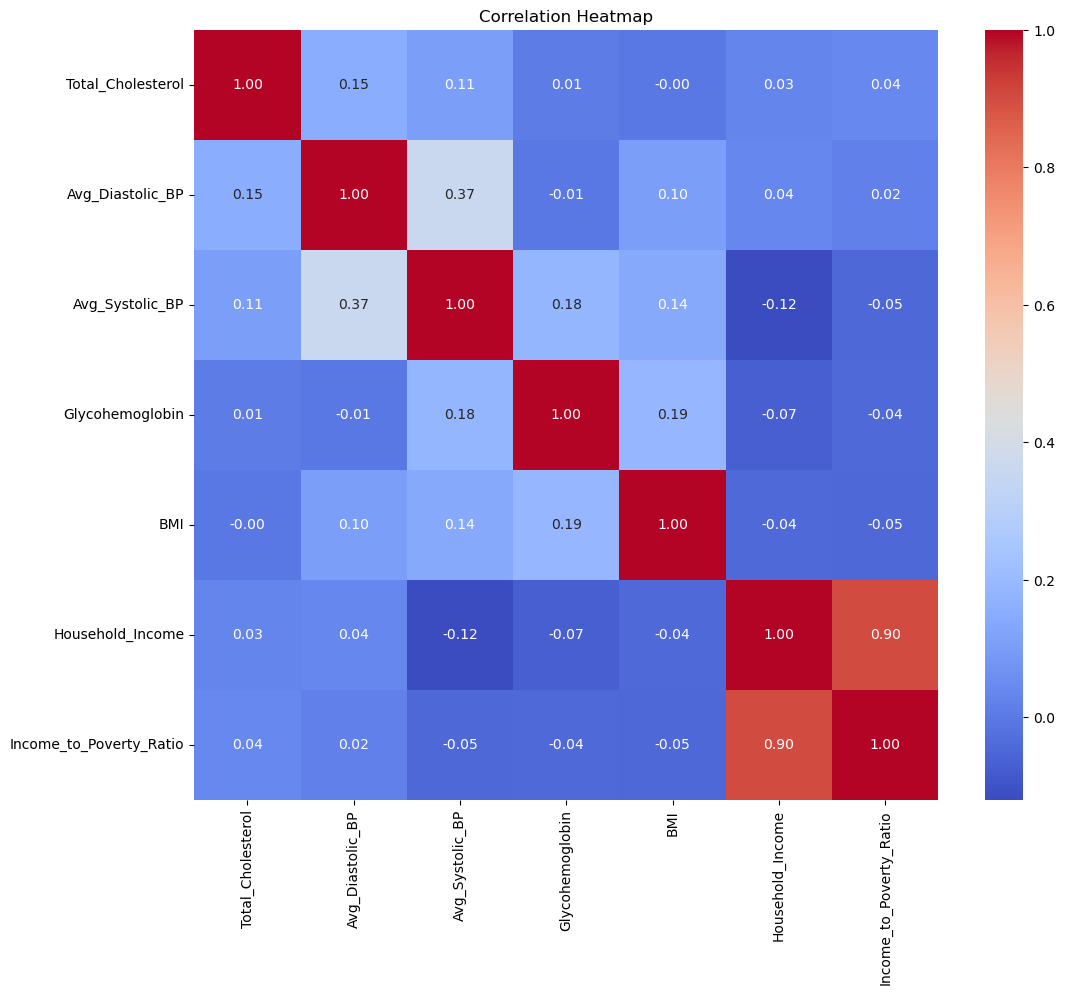

In [43]:
#Checking how our numerical variables are correlated to each other
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("Correlation Heatmap")
plt.show()

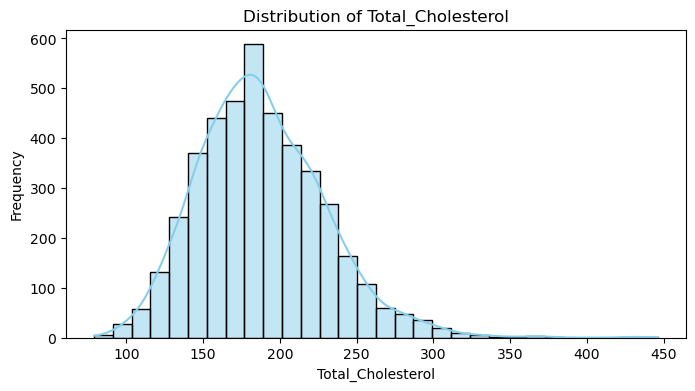

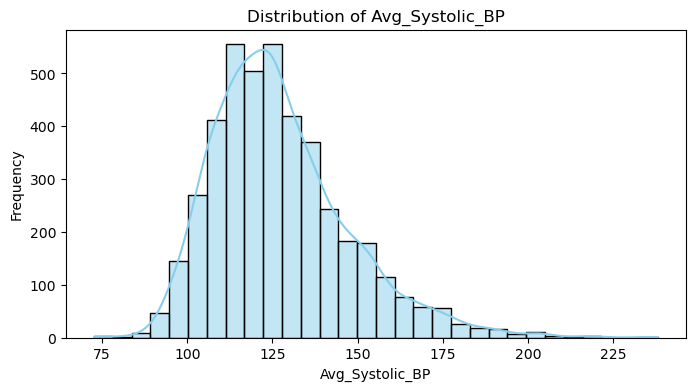

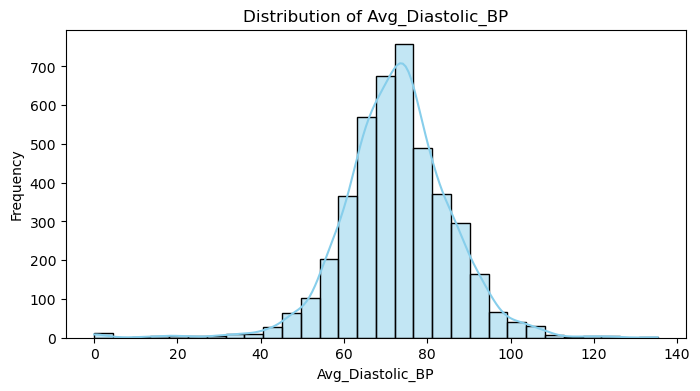

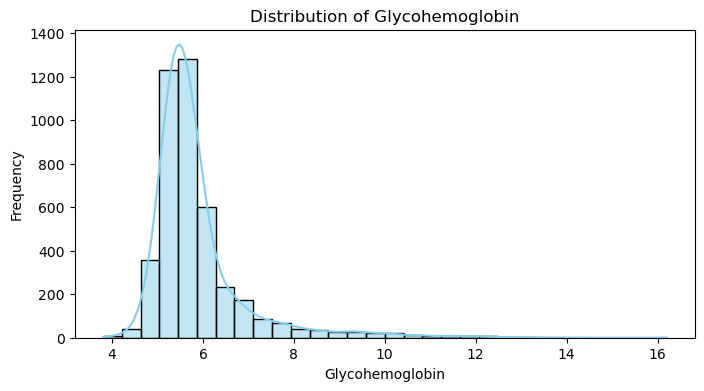

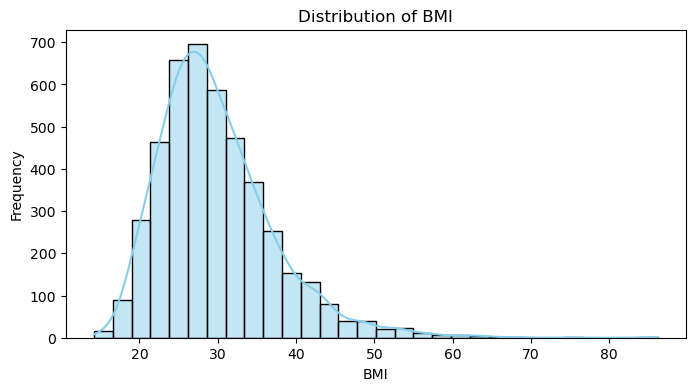

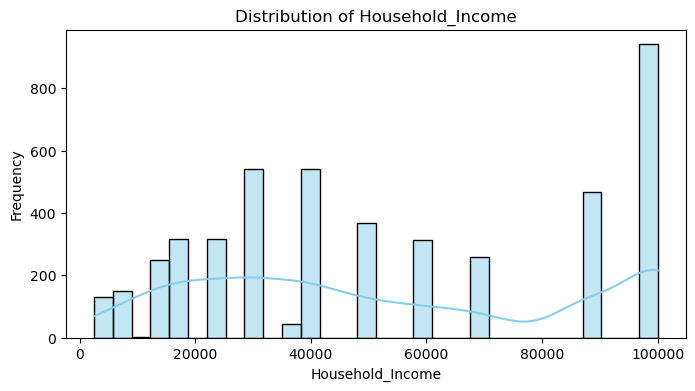

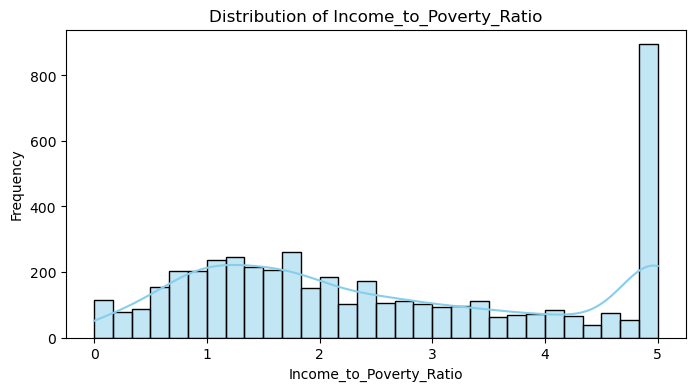

In [45]:
#EDA of our numerical variables
numerical_vars = ['Total_Cholesterol', 'Avg_Systolic_BP', 'Avg_Diastolic_BP',
'Glycohemoglobin', 'BMI', 'Household_Income', 'Income_to_Poverty_Ratio']

for col in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'pallete'

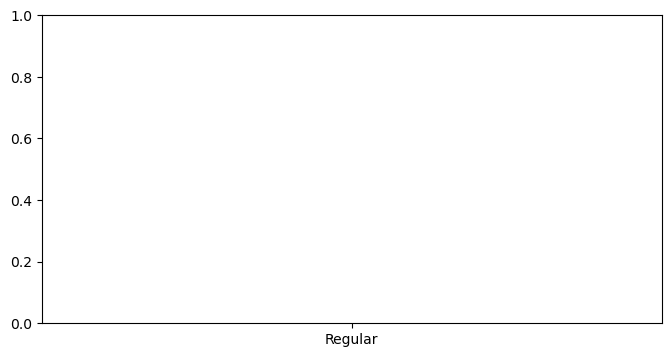

In [49]:
#EDA of our categorical variables
for col in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, pallete = 'magma' )
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Boxplots to detect any outliers in our dataset
for col in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='gold')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()
    
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
# Remove outliers from each numerical variable
for col in numerical_vars:
    original_size = len(df)
    df = remove_outliers(df, col)
    print(f"Removed outliers from {col}. Rows before: {original_size}, after: {len(df)}.")

****Some more EDA**** 

In [ ]:
#Pair plot for numerical variables
sns.pairplot(df[numerical_vars], diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

In [ ]:
#Relationships we want to analyze

relationships = [
    ('Total_Cholesterol', 'BMI'),
    ('Avg_Systolic_BP', 'Avg_Diastolic_BP'),
    ('Glycohemoglobin', 'BMI'),
    ('Total_Cholesterol', 'Avg_Systolic_BP'),
    ('Avg_Diastolic_BP', 'Glycohemoglobin'),
    ('BMI', 'Household_Income'),
    ('Income_to_Poverty_Ratio', 'BMI'),
    ('Total_Cholesterol', 'Glycohemoglobin'),
    ('Avg_Systolic_BP', 'Household_Income'),
    ('BMI', 'Avg_Systolic_BP')
]

# Generate scatter plots for relationships
for x, y in relationships:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, hue="Participant_Gender", alpha=0.7, palette="viridis")
    plt.title(f"Scatter Plot: {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title="Gender", loc='best')
    plt.show()

In [ ]:
#Grouped bar charts for categorical vs numerical variables
for cat_var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=cat_var, y='BMI', palette='coolwarm', ci=None)
    plt.title(f"Average BMI by {cat_var}")
    plt.xticks(rotation=45)
    plt.ylabel('Average BMI')
    plt.show()